In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe
from matplotlib.ticker import FormatStrFormatter

import os; print(os.getcwd())

import result_utils

/net/lem/data1/regt/retrieval_base/Luhman_16/figures


In [2]:
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['font.size'] = 11
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.facecolor'] = 'none'
plt.rcParams['axes.edgecolor'] = 'w'
plt.rcParams['axes.labelcolor'] = 'w'
plt.rcParams['xtick.color'] = 'w'; plt.rcParams['ytick.color'] = 'w'
plt.rcParams['xtick.labelcolor'] = 'w'; plt.rcParams['ytick.labelcolor'] = 'w'
# plt.rcParams['figure.facecolor'] = 'k'
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['figure.edgecolor'] = 'w'

In [3]:
c_species = {'HF':'#FF59B4', 'FeH':'#00DBA8', 'H2O':'C3', 'K':'C0', 'Na':'C1'}

In [4]:
name_A = 'Luhman 16A'; name_B = 'Luhman 16B'
color_A = '#FF622E'; color_B = '#396ED8'

lw_d = 0.8
lw_m = 1.0

res_alpha = 0.85

A = result_utils.RetrievalResults('/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_A_ret_22_1column_n1000/test_')
B = result_utils.RetrievalResults('/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_62_1column_n1000/test_')

/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_A_ret_22_1column_n1000/test_data
  analysing data from /net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_A_ret_22_1column_n1000/test_.txt
/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_62_1column_n1000/test_data
  analysing data from /net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_62_1column_n1000/test_.txt


## Spectrum

In [5]:
def indicate_lines(ax, x, y, label, label_y=None, ha='center', c=None, **kwargs):

    if c is None:
        c = ax.spines['left'].get_ec()

    X = np.array([x[0],x[0],x[1],x[1]])
    Y = np.array([y[0],y[1],y[1],y[0]])
    ax.plot(X, Y, c=c, transform=ax.get_xaxis_transform(), **kwargs)

    text_kwargs = dict(ha=ha, va='center', fontsize=12, color=c)
    if label_y is None:
        label_y = y[1]
        text_kwargs['bbox'] = {'boxstyle':'square,pad=0.2', 'ec':'none', 'fc':'w'}

    if ha == 'left':
        x = x.min()
    elif ha == 'center':
        x = np.mean(x)
    elif ha == 'right':
        x = x.max()
    ax.text(x=x, y=label_y, s=label, transform=ax.get_xaxis_transform(), **text_kwargs)

In [6]:
A.load_components(['d_spec', 'LogLike'])
B.load_components(['d_spec', 'LogLike'])

A.get_model_spectrum()
B.get_model_spectrum()

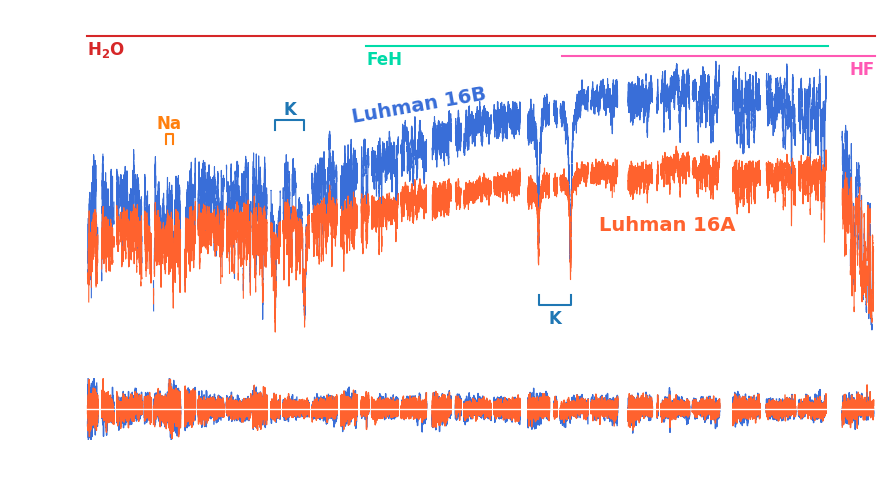

In [7]:
fig = plt.figure(figsize=(9,5))
gs = fig.add_gridspec(nrows=2, ncols=1, hspace=0.07, wspace=0, height_ratios=[0.84,0.16])
ax_res = fig.add_subplot(gs[1,0])
ax     = fig.add_subplot(gs[0,0])

# Plot the data and model fluxes
mask = B.d_spec['J1226_1'].flux.flatten()/B.d_spec['J1226_1'].flux.flatten()
ax.plot(B.d_spec['J1226_1'].wave.flatten(), B.d_spec['J1226_1'].flux.flatten(), c=color_B, lw=lw_d)

mask = A.d_spec['J1226_1'].flux.flatten()/A.d_spec['J1226_1'].flux.flatten()
ax.plot(A.d_spec['J1226_1'].wave.flatten(), A.d_spec['J1226_1'].flux.flatten(), c=color_A, lw=lw_d)

# Name labels
# ax.annotate(
#     name_A, xy=(0.45,0.43), xytext=(0.47,0.27), xycoords='axes fraction', ha='center', va='bottom', c=color_A, fontsize=14, fontweight='bold',   
#     arrowprops={'arrowstyle':'-', 'connectionstyle':'angle3,angleA=90,angleB=-30', 'shrinkA':0, 'shrinkB':0, 'lw':1, 'color':color_A, 'alpha':0.8}, 
#     )
# ax.annotate(
#     name_B, xy=(0.49,0.81), xytext=(0.46,0.83), xycoords='axes fraction', ha='right', va='bottom', c=color_B, fontsize=14, fontweight='bold', 
#     arrowprops={'arrowstyle':'-', 'connectionstyle':'angle3,angleA=0,angleB=-50', 'shrinkA':0, 'shrinkB':0, 'lw':1, 'color':color_B, 'alpha':0.8}, 
#     )
ax.annotate(
    name_A, xy=(1280,0.38), xycoords=ax.get_xaxis_transform(), rotation=0, ha='center', va='bottom', c=color_A, fontsize=14, fontweight='bold',
    # name_A, xy=(1220,0.28), xycoords=ax.get_xaxis_transform(), rotation=10, ha='center', va='bottom', c=color_A, fontsize=14, fontweight='bold',
    )
ax.annotate(
    name_B, xy=(1210,0.7), xycoords=ax.get_xaxis_transform(), rotation=10, ha='center', va='bottom', c=color_B, fontsize=14, fontweight='bold',
    )
    

# Indicate lines
wave_Na = np.array([1e7/8783.82852, 1e7/8766.63258]) * (1+A.d_spec['J1226_1'].v_bary/3e5)
indicate_lines(ax, wave_Na, [0.65,0.68], label='Na', label_y=0.71, lw=1.5, c=c_species['Na'])

wave_K = np.array([1e7/8551.81787, 1e7/8491.80409]) * (1+A.d_spec['J1226_1'].v_bary/3e5)
indicate_lines(ax, wave_K, [0.69,0.72], label='K', label_y=0.75, lw=1.5, c=c_species['K'])

wave_K = np.array([1e7/7983.67489, 1e7/8041.38112]) * (1+A.d_spec['J1226_1'].v_bary/3e5)
indicate_lines(ax, wave_K, [0.2,0.17], label='K', label_y=0.13, lw=1.5, c=c_species['K'])

wave_FeH = np.array([1195,1325]) * (1+A.d_spec['J1226_1'].v_bary/3e5)
indicate_lines(ax, wave_FeH, [0.94,0.94], label='FeH', label_y=0.90, lw=1.5, ha='left', c=c_species['FeH'])

wave_H2O = np.array([A.d_spec['J1226_1'].wave.min(),A.d_spec['J1226_1'].wave.max()]) * (1+A.d_spec['J1226_1'].v_bary/3e5)
indicate_lines(ax, wave_H2O, [0.97,0.97], label='H$_2$O', label_y=0.93, lw=1.5, ha='left', c=c_species['H2O'])

wave_HF = np.array([1250,A.d_spec['J1226_1'].wave.max()]) * (1+A.d_spec['J1226_1'].v_bary/3e5)
indicate_lines(ax, wave_HF, [0.91,0.91], label='HF', label_y=0.87, lw=1.5, ha='right', c=c_species['HF'])

# Residuals
'''
ax.plot(
    B.d_spec['J1226_1'].wave.flatten(), (B.d_spec['J1226_1'].flux-np.array(B.LogLike.m_flux_phi)).flatten(), c=color_B, lw=lw_m, alpha=res_alpha
)
ax.plot(
    A.d_spec['J1226_1'].wave.flatten(), (A.d_spec['J1226_1'].flux-np.array(A.LogLike.m_flux_phi)).flatten(), c=color_A, lw=lw_m, alpha=res_alpha
)
ax.axhline(0, c='k', lw=0.8, ls='-')
'''
ax_res.plot(
    B.d_spec['J1226_1'].wave.flatten(), 1e13*(B.d_spec['J1226_1'].flux-np.array(B.LogLike.m_flux_phi)).flatten(),
    c=color_B, lw=lw_m, 
)
ax_res.plot(
    A.d_spec['J1226_1'].wave.flatten(), 1e13*(A.d_spec['J1226_1'].flux-np.array(A.LogLike.m_flux_phi)).flatten(),
    c=color_A, lw=lw_m, 
)
ax_res.axhline(0, c=ax_res.spines['left'].get_ec(), lw=1.0, ls='-')

'''
idx = slice(20,21)
ax_zoom = ax.inset_axes([0.64, 0.09, 0.3, 0.36])

ax_zoom.plot(B.d_spec['J1226_1'].wave[idx].flatten(), B.d_spec['J1226_1'].flux[idx].flatten(), c=color_B, lw=lw_d, alpha=res_alpha)
ax_zoom.plot(A.d_spec['J1226_1'].wave[idx].flatten(), A.d_spec['J1226_1'].flux[idx].flatten(), c=color_A, lw=lw_d, alpha=res_alpha)

mask = B.d_spec['J1226_1'].flux[idx].flatten()/B.d_spec['J1226_1'].flux[idx].flatten()
ax_zoom.plot(B.d_spec['J1226_1'].wave[idx].flatten(), np.array(B.LogLike.m_flux_phi[idx]).flatten()*mask, c='k', lw=0.8)
mask = A.d_spec['J1226_1'].flux[idx].flatten()/A.d_spec['J1226_1'].flux[idx].flatten()
ax_zoom.plot(A.d_spec['J1226_1'].wave[idx].flatten(), np.array(A.LogLike.m_flux_phi[idx]).flatten()*mask, c='k', lw=0.8)

xlim = (A.d_spec['J1226_1'].wave_ranges_chips[idx].min(), A.d_spec['J1226_1'].wave_ranges_chips[idx].max())
xlim = (1286.8, 1294.7)

ax_zoom.set(yticks=[], xlim=xlim)
ax_zoom.tick_params(axis='x', which='both', pad=2)
ax_zoom.set_xticks(np.arange(1287, 1295, 2), minor=True)
ax.indicate_inset_zoom(ax_zoom)
'''

xticks = np.arange(1100, 1400, 25)
ax.set_xticks(xticks); ax_res.set_xticks(xticks)

xlim = (A.d_spec['J1226_1'].wave_ranges_chips.min()-2, A.d_spec['J1226_1'].wave_ranges_chips.max()+2)
# ax.set(xticklabels=[], ylabel=r'$F_\lambda\ (\mathrm{erg\ s^{-1}\ cm^{-2}\ nm^{-1}})$', xlim=xlim, ylim=(0.0, 1.55e-13))
ax.set(xticklabels=[], ylabel=r'$\bf F_\lambda\ (erg\ s^{-1}\ cm^{-2}\ nm^{-1})$', xlim=xlim, ylim=(0, 1.6e-13))
ax_res.set(xlabel=r'Wavelength (nm)', ylabel='Residuals', xlim=xlim, ylim=(-0.15, 0.15))

plt.subplots_adjust(left=0.09, bottom=0.11, top=0.94, right=0.98)
plt.savefig('./plots/J_band_spectrum_poster.pdf')
plt.savefig('./plots/J_band_spectrum_poster.png')
plt.show()

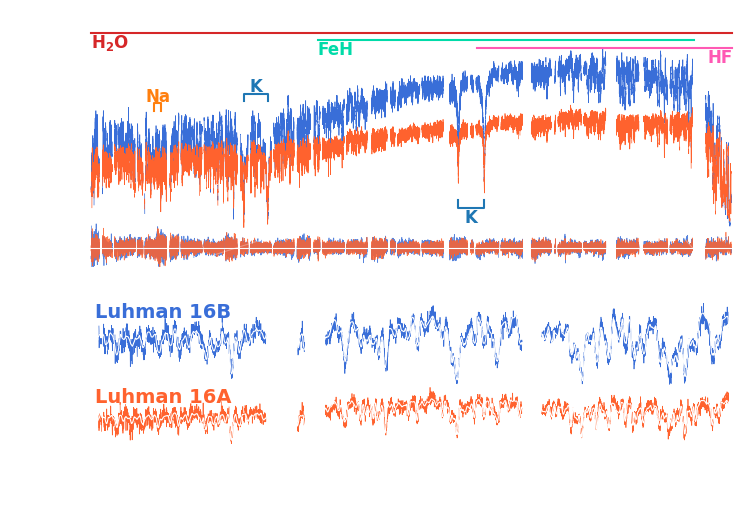

In [8]:
idx = slice(18,21)
lw_d = 0.5

fig = plt.figure(figsize=(7.5,5))
gs = fig.add_gridspec(nrows=2, ncols=1, hspace=0.14, wspace=0, height_ratios=[0.55,0.35])
ax_res = fig.add_subplot(gs[1,0])
ax     = fig.add_subplot(gs[0,0])

# Set ticks
xticks = np.arange(1120, 1350, 10)
# xticks = np.arange(1100, 1400, 25)
ax.set_xticks(xticks, minor=True)

xlim = (A.d_spec['J1226_1'].wave_ranges_chips[idx].min()-0.34, A.d_spec['J1226_1'].wave_ranges_chips[idx].max()+0.3)
xticks = np.arange(xlim[0]//1, xlim[1]//1+1, 1)
ax_res.set_xticks(xticks, minor=True)
ax_res.set(xlim=xlim)

# Remove the 1e-13 from the bottom axis
t = ax_res.yaxis.get_offset_text()
t.set_visible(False)

# Plot the data and model fluxes
mask = B.d_spec['J1226_1'].flux.flatten()/B.d_spec['J1226_1'].flux.flatten()
ax.plot(B.d_spec['J1226_1'].wave.flatten(), B.d_spec['J1226_1'].flux.flatten(), c=color_B, lw=lw_d)

mask = A.d_spec['J1226_1'].flux.flatten()/A.d_spec['J1226_1'].flux.flatten()
ax.plot(A.d_spec['J1226_1'].wave.flatten(), A.d_spec['J1226_1'].flux.flatten(), c=color_A, lw=lw_d)

# Name labels
ax_res.annotate(name_A, xy=(1268.7,0.98e-13), ha='left', va='center', c=color_A, fontsize=14, fontweight='bold')
ax_res.annotate(name_B, xy=(1268.7,1.39e-13), ha='left', va='center', c=color_B, fontsize=14, fontweight='bold')

ax.annotate(
    'Residuals', xy=(1305,0), xytext=(1296,0.18e-13), ha='right', va='center', c='w', fontsize=12, fontweight='bold', 
    arrowprops={'arrowstyle':'-', 'connectionstyle':'angle3,angleA=7,angleB=100', 'shrinkA':0, 'shrinkB':10, 'lw':0.8, 'color':'w', 'alpha':0.8},
    )
ax_res.annotate(
    'Retrieval models', xy=(1279,1.24e-13), xytext=(1278,1.04e-13), ha='center', va='center', c='w', fontsize=12, fontweight='bold',
    arrowprops={'arrowstyle':'-', 'connectionstyle':'arc3,rad=-0.4', 'shrinkA':0, 'shrinkB':10, 'lw':0.8, 'color':'w', 'alpha':0.8},
)
ann = ax_res.annotate(
    'Retrieval models', xy=(1277,0.88e-13), xytext=(1278,1.04e-13), ha='center', va='center', c='w', fontsize=12, fontweight='bold',
    arrowprops={'arrowstyle':'-', 'connectionstyle':'arc3,rad=-0.4', 'shrinkA':0, 'shrinkB':10, 'lw':0.8, 'color':'w', 'alpha':0.8},
)

# Indicate lines
wave_Na = np.array([1e7/8783.82852, 1e7/8766.63258]) * (1+A.d_spec['J1226_1'].v_bary/3e5)
indicate_lines(ax, wave_Na, [0.65,0.68], label='Na', label_y=0.71, lw=1.5, c=c_species['Na'])

wave_K = np.array([1e7/8551.81787, 1e7/8491.80409]) * (1+A.d_spec['J1226_1'].v_bary/3e5)
indicate_lines(ax, wave_K, [0.69,0.72], label='K', label_y=0.75, lw=1.5, c=c_species['K'])

wave_K = np.array([1e7/7983.67489, 1e7/8041.38112]) * (1+A.d_spec['J1226_1'].v_bary/3e5)
indicate_lines(ax, wave_K, [0.28,0.25], label='K', label_y=0.21, lw=1.5, c=c_species['K'])

wave_FeH = np.array([1195,1325]) * (1+A.d_spec['J1226_1'].v_bary/3e5)
indicate_lines(ax, wave_FeH, [0.94,0.94], label='FeH', label_y=0.90, lw=1.5, ha='left', c=c_species['FeH'])

wave_H2O = np.array([A.d_spec['J1226_1'].wave.min(),A.d_spec['J1226_1'].wave.max()]) * (1+A.d_spec['J1226_1'].v_bary/3e5)
indicate_lines(ax, wave_H2O, [0.97,0.97], label='H$_2$O', label_y=0.93, lw=1.5, ha='left', c=c_species['H2O'])

wave_HF = np.array([1250,A.d_spec['J1226_1'].wave.max()]) * (1+A.d_spec['J1226_1'].v_bary/3e5)
indicate_lines(ax, wave_HF, [0.91,0.91], label='HF', label_y=0.87, lw=1.5, ha='right', c=c_species['HF'])

# Residuals
ax.plot(
    B.d_spec['J1226_1'].wave.flatten(), (B.d_spec['J1226_1'].flux-np.array(B.LogLike.m_flux_phi)).flatten(), c=color_B, lw=lw_d, alpha=res_alpha
)
ax.plot(
    A.d_spec['J1226_1'].wave.flatten(), (A.d_spec['J1226_1'].flux-np.array(A.LogLike.m_flux_phi)).flatten(), c=color_A, lw=lw_d, alpha=res_alpha
)
ax.axhline(0, c=ax.spines['left'].get_ec(), lw=0.8)

ax_res.plot(B.d_spec['J1226_1'].wave[idx].flatten(), B.d_spec['J1226_1'].flux[idx].flatten(), c=color_B, lw=lw_d)
ax_res.plot(A.d_spec['J1226_1'].wave[idx].flatten(), A.d_spec['J1226_1'].flux[idx].flatten(), c=color_A, lw=lw_d)

mask = np.ones_like(B.d_spec['J1226_1'].wave); mask[:,[0,-1]] = np.nan
ax_res.plot(B.d_spec['J1226_1'].wave[idx].flatten(), np.array(B.m_spec_broad['J1226_1'].flux_binned*B.LogLike.phi[:,None]*mask)[idx].flatten(), c='w', lw=0.8)
mask = np.ones_like(A.d_spec['J1226_1'].wave); mask[:,[0,-1]] = np.nan
ax_res.plot(A.d_spec['J1226_1'].wave[idx].flatten(), np.array(A.m_spec_broad['J1226_1'].flux_binned*A.LogLike.phi[:,None]*mask)[idx].flatten(), c='w', lw=0.8)

# Indicate the zoom region
from matplotlib.patches import ConnectionPatch
indicate_lines(ax, xlim, [0.5,0.47], label='', lw=1.5, c='w')
kwargs = dict(coordsA=ax.get_xaxis_transform(), coordsB=ax_res.get_xaxis_transform(), color='w', lw=0.8, alpha=0.3, zorder=20)
con = ConnectionPatch(xyA=(xlim[0], 0.47), xyB=(xlim[0], 1), **kwargs); ax.add_artist(con)
con = ConnectionPatch(xyA=(xlim[1], 0.47), xyB=(xlim[1], 1), **kwargs); ax.add_artist(con)

xlim = (A.d_spec['J1226_1'].wave_ranges_chips.min()-2, A.d_spec['J1226_1'].wave_ranges_chips.max()+2)
ax.set(ylabel=r'$\bf F_\lambda\ (erg\ s^{-1}\ cm^{-2}\ nm^{-1})$', xlim=xlim, ylim=(-0.15e-13, 1.6e-13))
ax_res.set(xlabel=r'Wavelength (nm)')

plt.subplots_adjust(left=0.11, bottom=0.1, top=0.95, right=0.98)
plt.savefig('./plots/J_band_spectrum_poster.pdf')
plt.savefig('./plots/J_band_spectrum_poster.png', dpi=500)
plt.show()

## Potassium doublet

In [9]:
B_2 = result_utils.RetrievalResults('/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_62_1column_n100_vdW/test_')
B_2.load_components(['d_spec', 'LogLike'])

/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_62_1column_n100_vdW/test_data
  analysing data from /net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_62_1column_n100_vdW/test_.txt


In [10]:
from retrieval_base.model_components.line_opacity import LineOpacity

# Load and modify the settings
B.load_components(['m_spec', 'LineOpacity'])
m_spec = B.m_spec['J1226_1']
m_spec.pressure = np.array([10.0,1.0,0.1])

# Initialise
kwargs = B.LineOpacity['J1226_1'][0].kwargs.copy()
Line_i = LineOpacity(m_spec=m_spec, **kwargs)
Line_wo_shift_i = LineOpacity(m_spec=m_spec, **kwargs)

# Update the settings (i.e. VMR(K)=1, T=constant)
Line_i._update_parameters(T=1500., VMRs={}, mass_fractions={}, ParamTable=B.ParamTable)
Line_wo_shift_i._update_parameters(T=1500., VMRs={}, mass_fractions={}, ParamTable=B.ParamTable)
Line_wo_shift_i.d *= 0


--- 39K__Kurucz -------------
Loaded 41 transitions, 9 will be calculated on-the-fly
On-the-fly transitions:
nu_0 (cm^-1): [9072.05  9069.742 8551.802 8494.092 8491.784 8041.365 7983.655 6593.17
 6590.862]
wave_0 (nm):  [1102.287 1102.567 1169.344 1177.289 1177.609 1243.57  1252.559 1516.721
 1517.252]


--- 39K__Kurucz -------------
Loaded 41 transitions, 9 will be calculated on-the-fly
On-the-fly transitions:
nu_0 (cm^-1): [9072.05  9069.742 8551.802 8494.092 8491.784 8041.365 7983.655 6593.17
 6590.862]
wave_0 (nm):  [1102.287 1102.567 1169.344 1177.289 1177.609 1243.57  1252.559 1516.721
 1517.252]



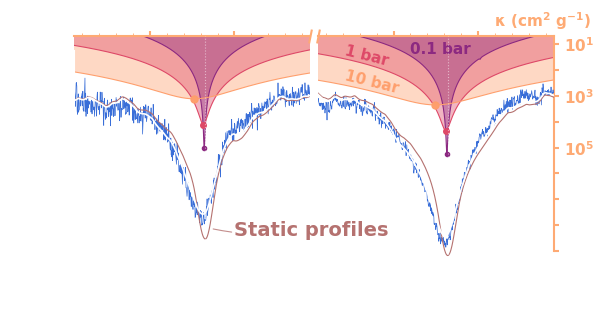

In [11]:
from matplotlib import colors
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

# cmap = mpl.colors.LinearSegmentedColormap.from_list('', ['C0','k'])
# cmap = plt.get_cmap('magma_r')
# cmap = plt.get_cmap('pink'); c_spines = cmap(0.3)
# cmap = plt.get_cmap('magma'); c_spines = cmap(0.3)
cmap = truncate_colormap(plt.get_cmap('magma_r'), 0.0, 0.6)
c_spines = cmap(0.3)

idx = [15,16]
width = 2.8
xlim = [1243.5+np.array([-1,1])*width/2, 1252.5+np.array([-1,1])*width/2]
ylim = [0.38e-13, 1.35e-13]
ylim_opa = [1e9, 5e0]

labels = ['10 bar', '1 bar', '0.1 bar']
ann_xy = [((1251.4,8e2),-14), ((1251.4,7e1),-14), ((1252.2,2.3e1),0)]

fig = plt.figure(figsize=(6,3.1))
gs = fig.add_gridspec(
    # nrows=3, ncols=4, hspace=0.07, wspace=0.03, height_ratios=[0.02,1.,0.02], width_ratios=[0.02,0.5,0.5,0.02]
    nrows=3, ncols=2, hspace=0.0, wspace=0.03, height_ratios=[0.07,0.96,0.07], width_ratios=[0.5,0.5]
    )

ax_opa = np.array([fig.add_subplot(gs[:2,0]), fig.add_subplot(gs[:2,1])])
ax = np.array([fig.add_subplot(gs[1:,0]), fig.add_subplot(gs[1:,1])])

ax[0].spines[['right','top']].set_visible(False)
ax[1].spines[['left','top','right']].set_visible(False)
ax[1].set(yticks=[])

ax_opa[0].spines[['left','right','bottom']].set_visible(False)
ax_opa[1].spines[['left','bottom']].set_visible(False)
ax_opa[0].xaxis.tick_top()

ax_opa[1].xaxis.set_label_position('top')
ax_opa[1].yaxis.set_label_position('right')
ax_opa[1].yaxis.tick_right()
ax_opa[1].xaxis.tick_top()

t = ax[0].yaxis.get_offset_text()
t.set_x(-0.02); t.set_ha('right'); t.set_va('center')

# Change axis colors
ax_opa[0].spines[['top']].set(color=c_spines); ax_opa[1].spines[['right','top']].set(color=c_spines)
ax_opa[0].tick_params(axis='both', which='both', colors=c_spines, labelcolor=c_spines)
ax_opa[1].tick_params(axis='both', which='both', colors=c_spines, labelcolor=c_spines)
# ax_opa[1].set_ylabel(r'$\bf\kappa\ (cm^2\ g^{-1})$', color=c_spines, y=0.7)
ax_opa[1].set_xlabel(r'$\bf\kappa\ (cm^2\ g^{-1})$', color=c_spines, x=0.95, labelpad=0)

# Indicate break in the x-axis
d = 5
kwargs = dict(marker=[(-1,-d),(1,d)], markersize=10, linestyle='none', mew=1.5, clip_on=False,)
ax[0].plot([1], [0], transform=ax[0].transAxes, c=ax[0].spines['left'].get_ec(), mec=ax[0].spines['left'].get_ec(), **kwargs)
ax[1].plot([0], [0], transform=ax[1].transAxes, c=ax[1].spines['left'].get_ec(), mec=ax[1].spines['left'].get_ec(), **kwargs)

ax_opa[0].plot([1], [1], transform=ax_opa[0].transAxes, c=c_spines, mec=c_spines, **kwargs)
ax_opa[1].plot([0], [1], transform=ax_opa[1].transAxes, c=c_spines, mec=c_spines, **kwargs)

# Set ticks
ax[0].set_xticks([1243,1244]); ax[0].set_xticks(np.arange(xlim[0][0]//1,1270,0.2), minor=True)
ax_opa[0].set_xticks([1243,1244]); ax_opa[0].set_xticks(np.arange(xlim[0][0]//1,1270,0.2), minor=True)

ax[1].set_xticks([1252,1253]); ax[1].set_xticks(np.arange(xlim[1][0]//1,1270,0.2), minor=True)
ax_opa[1].set_xticks([1252,1253]); ax_opa[1].set_xticks(np.arange(xlim[1][0]//1,1270,0.2), minor=True)

ax_opa[0].set_yscale('log'); ax_opa[1].set_yscale('log')
# ax_opa[1].set(yticks=10**np.arange(0,10,1), yticklabels=[r'$10^0$','',r'$10^2$','',r'$10^4$','',r'$10^6$','','',''])
ax_opa[1].set(yticks=10**np.arange(0,10,1), yticklabels=['',r'$10^1$','',r'$10^3$','',r'$10^5$','','','',''])

for i in range(len(ax)):
    ax[i].plot(B.d_spec['J1226_1'].wave[idx[i]], B.d_spec['J1226_1'].flux[idx[i]], c=color_B, lw=lw_d)
    ax[i].plot(B_2.d_spec['J1226_1'].wave[idx[i]], np.array(B_2.LogLike.m_flux_phi[idx[i]]), c='#B57270', lw=0.8)
    # ax[i].plot(B_2.d_spec['J1226_1'].wave[idx[i]], np.array(B_2.LogLike.m_flux_phi[idx[i]]), c='w', alpha=0.5, lw=0.8)
    ax[i].plot(B.d_spec['J1226_1'].wave[idx[i]], np.array(B.LogLike.m_flux_phi[idx[i]]), c='w', lw=1.2)

    ax[i].set(xlim=xlim[i], ylim=ylim)

    wave_micron = 1e4/Line_i.nu_grid[idx[i]]
    opacity = Line_i.abs_opacity(wave_micron, m_spec.pressure)
    for j, opa_j in enumerate(opacity.T):
        c_j = cmap((j+1)/len(m_spec.pressure))
        # c_j = cmap((len(m_spec.pressure)-j)/len(m_spec.pressure))
        ax_opa[i].fill_between(1e3*wave_micron*(1+B.d_spec['J1226_1'].v_bary/3e5), opa_j, 1e-10, fc=c_j, alpha=0.4, ec='none', zorder=j-10)
        ax_opa[i].plot(1e3*wave_micron * (1+B.d_spec['J1226_1'].v_bary/3e5), opa_j, c=c_j, lw=0.8, zorder=-j)
        ax_opa[i].plot(1e3*wave_micron[np.argmax(opa_j)] * (1+B.d_spec['J1226_1'].v_bary/3e5), np.max(opa_j), 'o', markersize=5-j, c=c_j)

        # Label the opacities
        if i==1:
            xy, r = ann_xy[j]
            ax_opa[i].annotate(labels[j], xy=xy, c=c_j, rotation=r, fontweight='bold', fontsize=11, ha='left')

    # Indicate the wavelength of the K doublet lines
    ax[i].axvline(1e7/8041.365 * (1+B.ParamTable.get('rv')/3e5), c=ax[i].spines['left'].get_ec(), lw=0.8, ls=':', alpha=0.5, ymax=1+0.07, clip_on=False)
    ax[i].axvline(1e7/7983.655 * (1+B.ParamTable.get('rv')/3e5), c=ax[i].spines['left'].get_ec(), lw=0.8, ls=':', alpha=0.5, ymax=1+0.07, clip_on=False)

    ax_opa[i].set(xlim=xlim[i], ylim=ylim_opa, xticklabels=[])

ax[1].annotate(
    'PT-dependent', xy=(1252.4,0.69e-13), xytext=(1252.1,0.75e-13), ha='right', va='center', c='w', fontsize=14, fontweight='bold',
    arrowprops={'arrowstyle':'-', 'connectionstyle':'arc3,rad=-0.2', 'shrinkA':0, 'shrinkB':3, 'lw':0.8, 'color':'w', 'alpha':0.8},
)

ax[0].annotate(
    'Static profiles', xy=(1243.7,0.55e-13), xytext=(1244.0,0.54e-13), ha='left', va='center', c='#B57270', fontsize=14, fontweight='bold',
    arrowprops={'arrowstyle':'-', 'connectionstyle':'arc3,rad=-0.1', 'shrinkA':0, 'shrinkB':3, 'lw':0.8, 'color':'#B57270', 'alpha':0.8},
)

ax[0].set_ylabel(r'$\bf F_\lambda\ (erg\ s^{-1}\ cm^{-2}\ nm^{-1})$')
ax[0].set_xlabel('Wavelength (nm)', x=1)
ax_opa[0].set(yticks=[]); ax_opa[0].yaxis.minorticks_off()

plt.subplots_adjust(left=0.12, bottom=0.17, top=0.91, right=0.92)
plt.savefig('./plots/J_band_K_doublet_poster.pdf')
plt.savefig('./plots/J_band_K_doublet_poster.png', dpi=500)
plt.show()

## Chemistry

In [12]:
A.load_components(['PT', 'Chem'])
B.load_components(['PT', 'Chem'])

In [13]:
tmp = np.load('CCF_HF_Luhman_16A.npz')
rv, CCF_HF_A, CCF_SNR_HF_A = tmp['arr_0'], tmp['arr_1'], tmp['arr_2']
tmp = np.load('CCF_HF_Luhman_16B.npz')
rv, CCF_HF_B, CCF_SNR_HF_B = tmp['arr_0'], tmp['arr_1'], tmp['arr_2']

tmp = np.load('CCF_FeH_Luhman_16A.npz')
rv, CCF_FeH_A, CCF_SNR_FeH_A = tmp['arr_0'], tmp['arr_1'], tmp['arr_2']
tmp = np.load('CCF_FeH_Luhman_16B.npz')
rv, CCF_FeH_B, CCF_SNR_FeH_B = tmp['arr_0'], tmp['arr_1'], tmp['arr_2']

In [14]:
import pyfastchem as pyfc
import os

class FastChemistry():

    def __init__(self, pressures):

        self.pressures = pressures

        pyfc_path = '/net/lem/data1/regt/fastchem/'

        self.fastchem = pyfc.FastChem(
            f'{pyfc_path}/input/element_abundances/asplund_2020_extended.dat', 
            f'{pyfc_path}/input/logK/logK_extended.dat',
            f'{pyfc_path}/input/logK/logK_condensates.dat', 
            1)

        # Create in/out-put structures for FastChem
        self.input = pyfc.FastChemInput()
        self.input.pressure = self.pressures[::-1] # Flip to decrease

        self.output = pyfc.FastChemOutput()

        # Use equilibrium condensation
        self.input.equilibrium_condensation = True
        # Use rainout condensation approach
        self.input.rainout_condensation     = True

        # Configure FastChem's internal parameters
        self.fastchem.setParameter('accuracyChem', 1e-5)
        #self.fastchem.setParameter('accuracyElementConservation', 1e-5)
        #self.fastchem.setParameter('accuracyNewton', 1e-5)
        
        self.fastchem.setParameter('nbIterationsChem', 10000)
        #self.fastchem.setParameter('nbIterationsNewton', 10000)
        #self.fastchem.setParameter('nbIterationsNelderMead', 10000)

        # ------------------------------------------------------------------

        # Make a copy of the solar abundances from FastChem
        self.solar_abundances = np.array(self.fastchem.getElementAbundances())

        # Indices of carbon-bearing species
        self.index_C = np.array(self.fastchem.getElementIndex('C'))
        self.index_O = np.array(self.fastchem.getElementIndex('O'))

        print(self.index_C, self.index_O)

        # Compute the solar C/O ratio
        self.CO_solar = self.solar_abundances[self.index_C] / \
            self.solar_abundances[self.index_O]

        # Indices of H/He-bearing species
        index_H  = np.array(self.fastchem.getElementIndex('H'))
        index_He = np.array(self.fastchem.getElementIndex('He'))

        self.mask_metal = np.ones_like(self.solar_abundances, dtype=bool)
        self.mask_metal[index_H]  = False
        self.mask_metal[index_He] = False

    def get_VMR(self, species_i):
        index = self.fastchem.getGasSpeciesIndex(species_i)
        return self.VMR[:,index]
    
    def get_condensate_number_density(self, species_i):
        index = self.fastchem.getCondSpeciesIndex(species_i)
        return np.array(self.output.number_densities_cond)[::-1,index]

    def __call__(self, T, CO, FeH):

        temperature = T * np.ones_like(self.pressures)
        temperature[temperature<200] = 200
        self.input.temperature = temperature[::-1] # Flip for FastChem usage

        # Make a copy to modify the elemental abundances
        element_abundances = self.solar_abundances.copy()
        metallicity_wrt_solar = 10**FeH

        # Apply C/O ratio and Fe/H to elemental abundances
        element_abundances[self.index_C] = element_abundances[self.index_O] * CO
        #print(element_abundances[self.index_C] / element_abundances[self.index_O])
        #element_abundances[self.index_C] = element_abundances[self.index_O] * CO
        element_abundances[self.mask_metal] *= metallicity_wrt_solar

        # Update the element abundances
        self.fastchem.setElementAbundances(element_abundances)

        # Compute the number densities
        fastchem_flag = self.fastchem.calcDensities(self.input, self.output)

        if fastchem_flag != 0:
            # FastChem failed to converge
            print('Failed to converge')
        if np.amin(self.output.element_conserved) != 1:
            # Failed element conservation
            print('Failed element conservation')

        # Compute the volume-mixing ratio of all species
        gas_number_density_tot = np.array(self.input.pressure)*1e6 / \
            (1.3807e-16 * np.array(self.input.temperature))
        gas_number_density     = np.array(self.output.number_densities)

        self.VMR = gas_number_density / gas_number_density_tot[:,None]
        self.VMR = self.VMR[::-1] # Flip back

# Compute the chemical equilibrium abundances
FC = FastChemistry(pressures=B.PT['J1226_1'].pressure)
FC(T=B.PT['J1226_1'].temperature, CO=0.59, FeH=0.0)

FC_VMR = {hill_i: FC.get_VMR(hill_i) for hill_i in ['H2O1', 'F1H1', 'Fe1H1', 'Na', 'K']}

3 21


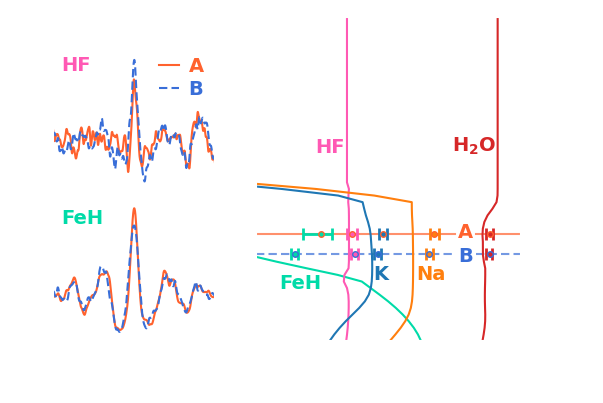

In [ ]:
xlim = (-370, 370)
ylims = [(-4,8), (-6,12)]

fig = plt.figure(figsize=(6,4))
gs = fig.add_gridspec(nrows=4, ncols=2, hspace=0.13, 
    wspace=0.19, width_ratios=[0.38,0.62], height_ratios=[0.03,0.03,1.,1.]
)
ax = np.array([
    fig.add_subplot(gs[-2,0]), fig.add_subplot(gs[-1,0]),
])
ax[0].set_title('Cross-correlation', c='w', fontsize=14, fontweight='bold')
ax[0].set_xticks(np.arange(-400, 401, 100), minor=True)
ax[1].set_xticks(np.arange(-400, 401, 100), minor=True)

ax[0].plot(rv, CCF_SNR_HF_A, c=color_A, lw=1.5, label='A')
ax[0].plot(rv, CCF_SNR_HF_B, c=color_B, lw=1.5, ls=(0,(4,2)), label='B')
ax[1].plot(rv, CCF_SNR_FeH_A, c=color_A, lw=1.5)
ax[1].plot(rv, CCF_SNR_FeH_B, c=color_B, lw=1.5, ls=(0,(4,2)))

ax[0].legend(loc='upper right', fontsize=14, frameon=False, labelcolor='linecolor', handlelength=1., handletextpad=0.5, labelspacing=0.2, borderpad=0.1)

kwargs = dict(xy=(0.05, 0.93), xycoords='axes fraction', ha='left', va='top', fontsize=14, fontweight='bold')
ax[0].annotate('HF', color=c_species['HF'], **kwargs)
ax[1].annotate('FeH', color=c_species['FeH'], **kwargs)

ax[1].set(xlim=xlim, ylim=ylims[1], xlabel=r'$\bf v_{rad}\ (km\ s^{-1})$')
ax[0].set(xlim=xlim, xticklabels=[], ylabel=r'$\bf S/N$', ylim=ylims[0])

ax_VMR = fig.add_subplot(gs[:,1])
ax_VMR.yaxis.set_label_position('right')
ax_VMR.yaxis.tick_right()

ax_VMR.set_xscale('log')
# ax_VMR.set_xticks(10**np.arange(-10,-1.,1), minor=False)
ax_VMR.set(
    xlabel=r'$\bf Abundance\ (VMR)$', xlim=(10**(-10),10**(-2.5)), 
    ylabel=r'$\bf Pressure\ (bar)$', yscale='log', ylim=(1e3,1e-5), 
)
# ax_VMR.set_xticks(10**np.arange(-9,-2.5,2), minor=False)
# ax_VMR.set_xticklabels([r'$10^{-9}$',r'$10^{-7}$',r'$10^{-5}$',r'$10^{-3}$'], minor=False)
ax_VMR.set_xticks(10**np.arange(-10,-2.5,1), minor=False)
ax_VMR.set_xticklabels(
    ['',r'$10^{-9}$','',r'$10^{-7}$','',r'$10^{-5}$','',r'$10^{-3}$'], minor=False)

# VMRs
dx_species = {'HF':-0.4, 'FeH':-0.85, 'H2O':-0.43, 'K':0.0, 'Na':-0.05}
dy_species = {'HF':+0.55, 'FeH':+0.13, 'H2O':+0.55, 'K':+0.16, 'Na':+0.16}
for i, species_i in enumerate(A.Chem['J1226_1'].species):

    if species_i in ['H2', 'He']:
        continue
    
    c_i = c_species.get(species_i, 'k')
    cmap = mpl.colors.LinearSegmentedColormap.from_list('', ['w',c_i])
    env_colors_i = cmap([0.4,0.6,0.8])
    env_colors_i[:,3] = 0.5

    P = 5
    idx_P = np.argmin(np.abs(A.Chem['J1226_1'].pressure - P))

    VMR_q = np.quantile(A.Chem['J1226_1'].VMRs_posterior[species_i][:,idx_P], q=result_utils.q)
    #xerr = np.abs(VMR_q[[0,-1]]-VMR_q[3])[:,None]
    xerr = np.abs(VMR_q[[1,-2]]-VMR_q[3])[:,None]
    ax_VMR.errorbar(
        VMR_q[3], 10**(np.log10(P)-0.34), xerr=xerr, fmt='o', c=c_i, label=species_i, markersize=4, capsize=4, elinewidth=2, capthick=2, mec=color_A, 
    )

    VMR_q = np.quantile(B.Chem['J1226_1'].VMRs_posterior[species_i][:,idx_P], q=result_utils.q)
    #xerr = np.abs(VMR_q[[0,-1]]-VMR_q[3])[:,None]
    xerr = np.abs(VMR_q[[1,-2]]-VMR_q[3])[:,None]
    # ax_VMR.plot(VMR_q[3], 10**(np.log10(P)+0.14), marker='o', c='w', markersize=5)
    ax_VMR.errorbar(
        VMR_q[3], 10**(np.log10(P)+0.14), xerr=xerr, fmt='o', c=c_i, markersize=4, capsize=4, elinewidth=2, capthick=2, mec=color_B, 
    )

    hill_i = B.Chem['J1226_1'].hill[i]
    ax_VMR.plot(FC_VMR[hill_i], B.PT['J1226_1'].pressure, c=c_i, lw=1.5, ls='-')

    x_i = A.Chem['J1226_1'].VMRs_posterior[species_i][0,-1]
    x_i = 10**(np.log10(x_i) + dx_species.get(species_i,0))

    y_i = 0.02+dy_species.get(species_i,0)

    if species_i == 'H2O':
        species_i = r'$\bf H_2O$'

    ax_VMR.annotate(
        species_i, xy=(x_i,y_i), xycoords=ax_VMR.get_xaxis_transform(), zorder=3, clip_on=True, 
        ha='center', va='bottom', c=c_i, fontsize=14, fontweight='bold', 
    )

x = 0.79
ax_VMR.annotate(
    'A', xy=(x,10**(np.log10(P)-0.34-0.05)), xycoords=ax_VMR.get_yaxis_transform(), 
    ha='center', va='center', c=color_A, fontsize=14, fontweight='bold',
)
ax_VMR.annotate(
    'B', xy=(x,10**(np.log10(P)+0.14+0.05)), xycoords=ax_VMR.get_yaxis_transform(), 
    ha='center', va='center', c=color_B, fontsize=14, fontweight='bold',
)
ax_VMR.axhline(10**(np.log10(P)-0.34), xmax=x-0.04, c=color_A, lw=1.5, zorder=-1, alpha=0.7)
ax_VMR.axhline(10**(np.log10(P)+0.14), xmax=x-0.04, c=color_B, lw=1.5, ls=(0,(4,2)), zorder=-1, alpha=0.7)
ax_VMR.axhline(10**(np.log10(P)-0.34), xmin=x+0.04, c=color_A, lw=1.5, zorder=-1, alpha=0.7)
ax_VMR.axhline(10**(np.log10(P)+0.14), xmin=x+0.04, c=color_B, lw=1.5, ls=(0,(4,2)), zorder=-1, alpha=0.7)

ax_VMR.annotate(
    'Equilibrium\n profiles', xy=(10**(-7.4),10**(-4.5)), xytext=(10**(-5.4),10**(-3.5)), ha='center', va='center', c='w', fontsize=14, fontweight='bold',
    arrowprops={'arrowstyle':'-', 'connectionstyle':'arc3,rad=0.2', 'shrinkA':2, 'shrinkB':3, 'lw':0.8, 'color':'w', 'alpha':0.8},
)
ax_VMR.annotate(
    'Equilibrium\n profiles', xy=(10**(-3.2),10**(-2.7)), xytext=(10**(-5.4),10**(-3.5)), ha='center', va='center', c='w', fontsize=14, fontweight='bold',
    arrowprops={'arrowstyle':'-', 'connectionstyle':'arc3,rad=0.2', 'shrinkA':1, 'shrinkB':3, 'lw':0.8, 'color':'w', 'alpha':0.8},
)

# Indicate the photospheric pressures
ax_VMR.plot(
    [-0.02,-0.045,-0.045,-0.02], [14,14,0.1,0.1], c='w', transform=ax_VMR.get_yaxis_transform(), clip_on=False, lw=1.5
    )
ax_VMR.annotate(
    'Photosphere', xy=(-0.06,1), xycoords=ax_VMR.get_yaxis_transform(), ha='right', va='center', 
    rotation=90, c='w', fontsize=14, fontweight='bold', clip_on=False,
)

plt.subplots_adjust(left=0.09, bottom=0.14, top=0.95, right=0.87)
plt.savefig('./plots/J_band_CCF_poster.pdf')
plt.savefig('./plots/J_band_CCF_poster.png', dpi=500)
plt.show()

In [ ]:
A.load_components(['Chem'])
all_line_species = np.array(A.Chem['J1226_1'].line_species)

m_flux = A.LogLike.m_flux_phi.copy()
mask = np.ones_like(m_flux)
mask[:,[0,-1]] = np.nan
m_flux *= mask

fig, ax = plt.subplots(figsize=(12,10), nrows=len(all_line_species[:-4]), ncols=1, sharex=True)#, sharey=True)

for i, line_species in enumerate(all_line_species[:-4]):
    if line_species in ['MMW', 'H2', 'He']:
        continue

    A.get_model_spectrum(line_species_to_exclude=[line_species])

    ax[i].plot(
        A.d_spec['J1226_1'].wave.flatten(), 
        np.abs(np.array(m_flux).flatten() - np.array(A.m_spec_broad['J1226_1'].flux_binned*A.LogLike.phi[:,None]).flatten()), 
        lw=lw_m
        )
    
    ax[i].set_ylabel(line_species)
    # ax[i].set_yscale('log')

plt.show()